# Capítulo 13: Redes Neurais Convolucionais (CNNs)

Este capítulo, do livro "Hands-On Machine Learning with Scikit-Learn & TensorFlow" de Aurélien Géron, dedica-se às **Redes Neurais Convolucionais (CNNs)**, explicando sua origem, componentes fundamentais e arquiteturas notáveis.

## 1. Origem e Inspiração das CNNs

*   As CNNs foram inspiradas no **córtex visual do cérebro**, com base nas descobertas de David H. Hubel e Torsten Wiesel sobre os campos receptivos locais dos neurônios visuais.
*   Essa pesquisa sugeriu que os neurônios de níveis superiores combinam padrões de neurônios de níveis inferiores, formando uma hierarquia para detecção de padrões complexos.
*   Marcos importantes na sua evolução incluem o **neocognitron (1980)** e o trabalho de **Yann LeCun (1998)**.
*   As CNNs são amplamente aplicadas em **reconhecimento de imagem**, mas também em reconhecimento de voz e processamento de linguagem natural (PNL).

## 2. A Camada Convolucional: Bloco Fundamental

A **camada convolucional** é o componente mais crucial de uma CNN.

*   **Campos Receptivos Locais**: Neurônios nesta camada não se conectam a todos os pixels da imagem de entrada (como em DNNs totalmente conectadas), mas apenas a uma pequena área dentro de seus campos receptivos locais. Isso permite focar em **características de baixo nível** (como bordas e linhas) nas camadas iniciais e combiná-las em características de alto nível nas camadas mais profundas.
*   **Preenchimento de Zeros (Zero Padding)**: Adiciona zeros ao redor das bordas da imagem para garantir que a camada de saída tenha a mesma altura e largura que a entrada, ou para controlar o tamanho.
*   **Passo (Stride)**: Define a distância entre campos receptivos consecutivos. Um passo maior resulta na redução da dimensionalidade da saída.
*   **Filtros (ou Kernels de Convolução)**: São pequenas imagens que representam os pesos de um neurônio. Eles detectam padrões específicos (por exemplo, linhas verticais ou horizontais) e geram **mapas de características** (feature maps) que destacam regiões da imagem semelhantes ao filtro.
*   **Compartilhamento de Parâmetros**: Todos os neurônios em um mesmo mapa de características **compartilham os mesmos pesos e viés**. Essa técnica reduz drasticamente o número de parâmetros do modelo e permite que a CNN reconheça um padrão em qualquer local da imagem.
*   **Hiperparâmetros**: Os hiperparâmetros de uma camada convolucional incluem o número e as dimensões (altura e largura) dos filtros, o passo e o tipo de preenchimento.
*   **Implementação em TensorFlow**: A função `tf.nn.conv2d()` é usada para criar uma camada convolucional.

## 3. A Camada de Pooling

A **camada de pooling** desempenha um papel importante na redução da dimensionalidade.

*   **Objetivos**: Reduz a dimensionalidade, o custo computacional e o uso de memória, ao mesmo tempo em que aumenta a robustez da rede a pequenas distorções ou translações de características (invariância a características).
*   **Operação**: Neurônios de pooling não possuem pesos. Eles agregam as entradas de seus campos receptivos locais usando uma função de agregação, como o **máximo (max pooling)** ou a **média (average pooling)**.
*   **Implementação em TensorFlow**: A função `tf.nn.max_pool()` é utilizada para a operação de max pooling.

## 4. Arquiteturas Típicas e Notáveis de CNNs

As CNNs geralmente empilham camadas convolucionais (frequentemente seguidas por uma camada ReLU) e camadas de pooling. A imagem de entrada diminui de tamanho, mas se torna mais "profunda" (com mais mapas de características). No topo dessa pilha, uma rede neural feedforward regular (com camadas densamente conectadas e ReLUs) é adicionada, culminando em uma camada final (por exemplo, Softmax) para a previsão.

O capítulo destaca várias arquiteturas de CNNs específicas:

*   **LeNet-5 (1998)**: Uma das primeiras arquiteturas de CNNs. Foi utilizada para reconhecimento de dígitos manuscritos (MNIST).
*   **AlexNet (2012)**: Vencedora do ILSVRC 2012. Significativamente maior e mais profunda que a LeNet-5, foi a primeira a empilhar camadas convolucionais diretamente e introduziu técnicas como **dropout** (com 50% de taxa) e **aumento de dados** para regularização.
*   **GoogLeNet (2014)**: Vencedora do ILSVRC 2014, atingindo uma taxa de erro top-5 abaixo de 7%. Sua inovação central são os **módulos de Inception**.
    *   **Módulos de Inception**: Permitem que a rede seja mais profunda com menos parâmetros. Eles executam convoluções de diferentes tamanhos (1x1, 3x3, 5x5) e max pooling em paralelo, concatenando os resultados.
    *   **Camadas Gargalo (Bottleneck Layers)**: Convoluções de 1x1 são usadas para reduzir a dimensionalidade antes das convoluções maiores, o que melhora a eficiência computacional.
    *   **Global Average Pooling**: Substitui as camadas densamente conectadas no topo da rede, reduzindo significativamente o número de parâmetros.
*   **ResNet (Rede Residual) (2015)**: Vencedora do ILSVRC 2015, com redes extremamente profundas (por exemplo, 152 camadas).
    *   **Conexões de Salto (Skip Connections) / Atalhos**: A principal inovação que permite o treinamento de redes muito profundas. Isso força a rede a modelar o *resíduo* ($f(x) = h(x) - x$) em vez da função completa ($h(x)$), acelerando o treinamento e mitigando o problema de gradientes que desaparecem.

Outras arquiteturas mencionadas incluem **VGGNet** (vice-campeã do ILSVRC 2014) e **Inception-v4** (que combina ideias de GoogLeNet e ResNet).

## 5. Outras Tarefas Visuais com CNNs

CNNs também são aplicadas em outras tarefas visuais importantes:

*   **Detecção e Localização de Objetos**: A rede pode gerar caixas delimitadoras ao redor de objetos na imagem, além de identificar suas classes.
*   **Segmentação de Imagem**: A rede classifica cada pixel da imagem de entrada, resultando em uma imagem de saída onde cada pixel indica a classe do objeto a que pertence.

## 6. Operações de Convolução em TensorFlow

TensorFlow oferece outras operações para camadas convolucionais, como `conv1d()` para entradas 1D (úteis em PNL) e `deconv2d()` (também conhecida como `conv2d_transpose()`) para deconvoluções, embora o nome "deconvolução" seja um tanto enganoso.

### Implementação

In [9]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#Carrega imagens amostrais
dataset = load_sample_images()
china = dataset.images[0]
flower = dataset.images[1]

# Criar seu array
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

print(f"Batch size: {batch_size}, Dimensões: {height}x{width}, Canais: {channels}")


Batch size: 2, Dimensões: 427x640, Canais: 3


In [4]:
#cria dois filtros

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #linha vertical
filters[3, :, :, 1] = 1 #linha horizontal

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


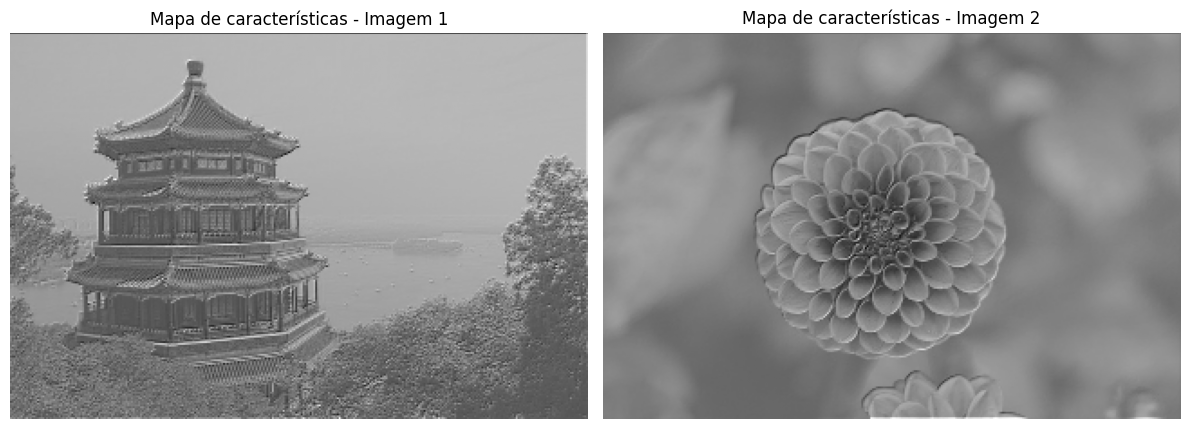


Forma da entrada: (2, 427, 640, 3)
Forma dos filtros: (3, 3, 3, 16)
Forma da saída (Keras): (2, 214, 320, 16)
Forma da saída (tf.nn.conv2d): (2, 214, 320, 16)


In [16]:
# Normalizar as imagens se necessário
dataset = dataset / 255.0

# Definir os filtros (kernel)
filters = tf.random.normal([3, 3, channels, 16])  # 16 filtros 3x3

# Usando Keras Layers (Recomendado)
inputs = tf.keras.Input(shape=(height, width, channels))
conv_layer = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=2,
    padding="same",
    use_bias=False
)

# Construir a camada e definir os pesos manualmente
conv_layer.build(inputs.shape)
conv_layer.set_weights([filters])

# Aplicar a convolução
convolution = conv_layer(inputs)

# Criar modelo
model = tf.keras.Model(inputs=inputs, outputs=convolution)

# Fazer a predição
output = model.predict(dataset)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.title("Mapa de características - Imagem 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output[1, :, :, 1], cmap="gray")
plt.title("Mapa de características - Imagem 2")
plt.axis('off')

plt.tight_layout()
plt.show()

# Informações sobre as saídas
print(f"\nForma da entrada: {dataset.shape}")
print(f"Forma dos filtros: {filters.shape}")
print(f"Forma da saída (Keras): {output.shape}")
print(f"Forma da saída (tf.nn.conv2d): {output_nn.shape}")

In [18]:
inputs = tf.keras.Input(shape=(height, width, channels))
conv = tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=7,
    strides=2,  # pode ser um inteiro ou (2, 2)
    padding="same"
)(inputs)

# Criar o modelo
model = tf.keras.Model(inputs=inputs, outputs=conv)

# Usar o modelo para fazer previsões
output = model.predict(dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


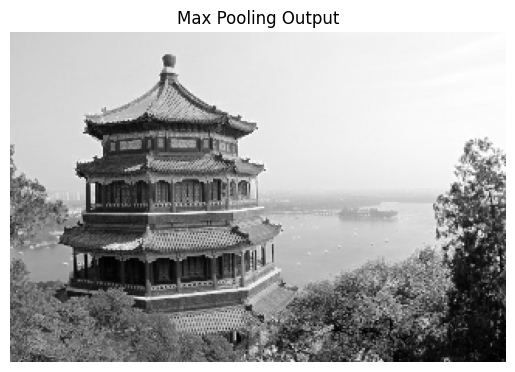

In [21]:
dataset = dataset / 255.0  # Normalizar

# Max Pooling simplificado
max_pool_layer = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid')
output = max_pool_layer(dataset)

# Visualizar
plt.imshow(np.mean(output[0], axis=-1), cmap='gray')
plt.title('Max Pooling Output')
plt.axis('off')
plt.show()

### Exercícios

1. Quais são as vantagens de uma CNN sobre uma DNN totalmente conectada para a classificação de imagens?

As Redes Neurais Convolucionais (CNNs) apresentam várias vantagens significativas sobre as Redes Neurais Densas (DNNs) totalmente conectadas para classificação de imagens.

A principal vantagem é a preservação da estrutura espacial das imagens. As CNNs mantêm a organização bidimensional dos pixels através de operações de convolução, enquanto as DNNs achatam a imagem em um vetor unidimensional, perdendo informações espaciais cruciais.

As CNNs são computacionalmente mais eficientes devido ao compartilhamento de parâmetros. Elas utilizam os mesmos filtros convolucionais em toda a imagem, drasticamente reduzindo o número de parâmetros necessários comparedo às DNNs totalmente conectadas, onde cada neurônio se conecta a todos os pixels da camada anterior.

Outra vantagem fundamental é a invariância translacional. As CNNs podem reconhecer padrões independentemente de sua posição na imagem, enquanto as DNNs tratam cada pixel como uma feature independente sem noção de proximidade espacial.

As CNNs também possuem uma capacidade inerente de aprendizado hierárquico de features. As camadas iniciais aprendem features simples como bordas e texturas, camadas intermediárias aprendem formas e partes de objetos, e camadas finais aprendem objetos completos.

Finalmente, as CNNs apresentam melhor regularização natural devido ao menor número de parâmetros e às operações de pooling, reduzindo significativamente o overfitting comparedo às DNNs totalmente conectadas, que são mais propensas a memorizar os dados de treinamento.

2. Considere uma CNN composta por três camadas convolucionais, cada uma com kernel 3x3, um stride de 2 e padding SAME. A camada inferior gera 100 mapas, a do meio gera 200 e a de cima 400. As imagens de entrada são RGB de 200x300 pixels. Qual é o número total de parâmetros na CNN? Se estivermos utilizando floats de 32 bits, quanto de RAM essa rede exigirá ao fazer uma previsão para uma única instância? E quando treinamos em um minilote de 50 imagens?

**A. Parâmetros:**
- Camada 1: 100 filtros, cada um com 3x3x3+1 = 28 parâmetros → 2.800
- Camada 2: 200 filtros, cada um com 3x3x100+1 = 901 parâmetros → 180.200
- Camada 3: 400 filtros, cada um com 3x3x200+1 = 1.801 parâmetros → 720.400
- Total: 2.800 + 180.200 + 720.400 = **903.400 parâmetros**
 
**B. RAM para previsão de 1 imagem:**
- Parâmetros: 903.400 × 4 bytes = 3,45 MB
- Ativações: entrada (0,7 MB), saída 1ª camada (6 MB), 2ª (3 MB), 3ª (1,5 MB) → Total ativações ≈ 10,7 MB
- Total ≈ **14,2 MB**
 
**C. RAM para minilote de 50 imagens:**
- Ativações: 10,7 MB × 50 = 535 MB
- Parâmetros: 3,45 MB
- Total ≈ **538,5 MB**

3. Se sua GPU ficar sem memória durante o treinamento de uma CNN, quais são cinco coisas que você poderia tentar para resolver?

- Reduzir o tamanho do minilote (batch size).
- Diminuir a resolução das imagens de entrada.
- Simplificar a arquitetura (menos camadas ou menos filtros por camada).
- Utilizar técnicas de checkpointing de ativação (activation checkpointing).
- Usar modelos mais leves (MobileNet, EfficientNet, etc.) ou quantização dos pesos.
- Se possível, utilizar uma GPU com mais memória ou treinar em múltiplas etapas (gradient accumulation).

4. Por que você adicionaria uma camada max pooling em vez de uma camada convolucional com o mesmo stride?

Adicionar uma camada de max pooling em vez de uma camada convolucional com o mesmo stride pode ser vantajoso pelos seguintes motivos:

1. **Redução de Dimensionalidade Simples**: A camada de max pooling reduz a dimensionalidade da entrada de forma eficiente, mantendo as características mais importantes (valores máximos) em cada região, enquanto uma camada convolucional pode introduzir mais parâmetros e complexidade.

2. **Invariância a Pequenas Translações**: Max pooling ajuda a tornar a rede mais robusta a pequenas translações ou distorções nos dados de entrada, pois seleciona o valor máximo em cada região, ignorando pequenas variações.

3. **Menor Custo Computacional**: Max pooling não possui pesos treináveis, o que reduz o custo computacional e a memória necessária, enquanto uma camada convolucional adiciona pesos que precisam ser otimizados durante o treinamento.

4. **Evitar Overfitting**: Como max pooling não aprende parâmetros, ele atua como uma forma de regularização, reduzindo a chance de overfitting, especialmente em redes profundas.

5. **Simplicidade**: Max pooling é uma operação mais simples e direta para reduzir a resolução espacial, enquanto uma camada convolucional pode introduzir complexidade adicional ao aprendizado.

5. Quando você adicionaria uma camada de normalização de resposta local?

A camada de normalização de resposta local (LRN) era usada principalmente em arquiteturas antigas, como AlexNet, para ajudar a destacar neurônios com ativações altas e inibir vizinhos, promovendo competição local. Você adicionaria uma LRN logo após camadas convolucionais (geralmente após a ativação ReLU) quando quiser aumentar a generalização e a invariância a mudanças de iluminação ou contraste, especialmente em tarefas de visão com imagens naturais. Hoje, é pouco usada, pois técnicas como batch normalization costumam ser mais eficazes.

6. Você pode citar as principais inovações na AlexNet em comparação com LeNet-5? E as principais inovações da GoogLeNet e da ResNet?

**Principais inovações na AlexNet em comparação com LeNet-5:**

1. **Profundidade e Tamanho**: AlexNet é significativamente maior e mais profunda que LeNet-5, com mais camadas convolucionais e filtros maiores.
2. **ReLU como Função de Ativação**: Introduziu a função de ativação ReLU, que acelera o treinamento em comparação com funções sigmoides ou tanh.
3. **Dropout**: Utilizou dropout para regularização, reduzindo o overfitting.
4. **Aumento de Dados**: Aplicou técnicas de aumento de dados, como translações e rotações, para melhorar a generalização.
5. **Treinamento em GPUs**: Foi uma das primeiras redes a aproveitar GPUs para acelerar o treinamento.
6. **Normalização de Resposta Local (LRN)**: Implementou LRN para melhorar a generalização.

**Principais inovações da GoogLeNet:**

1. **Módulos de Inception**: Introduziu módulos de Inception, que combinam convoluções de diferentes tamanhos e pooling em paralelo, reduzindo o número de parâmetros.
2. **Camadas Gargalo (Bottleneck)**: Usou convoluções 1x1 para reduzir a dimensionalidade antes de convoluções maiores, melhorando a eficiência computacional.
3. **Global Average Pooling**: Substituiu as camadas densamente conectadas no topo da rede, reduzindo significativamente os parâmetros.
4. **Profundidade com Eficiência**: Tornou possível redes mais profundas sem aumentar drasticamente os parâmetros.

**Principais inovações da ResNet:**

1. **Conexões de Salto (Skip Connections)**: Introduziu conexões residuais, permitindo que redes muito profundas sejam treinadas ao modelar o resíduo em vez da função completa.
2. **Treinamento de Redes Profundas**: Mitigou o problema de gradientes que desaparecem, permitindo redes com mais de 100 camadas.
3. **Simplicidade**: Manteve uma arquitetura simples e eficiente, com blocos residuais fáceis de implementar.

7. Construa sua própria CNN e tente atingir a maior precisão possível no MNIST

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.8963 - loss: 0.4345 - val_accuracy: 0.9446 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.8963 - loss: 0.4345 - val_accuracy: 0.9446 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9664 - loss: 0.1971 - val_accuracy: 0.9867 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9664 - loss: 0.1971 - val_accuracy: 0.9867 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9758 - loss: 0.1636 - val_accuracy: 0.9915 - val_loss: 0.1085 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9758 - loss: 0.1636 - val_accuracy: 0.9915 - val_loss: 0.1085 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9794 - l

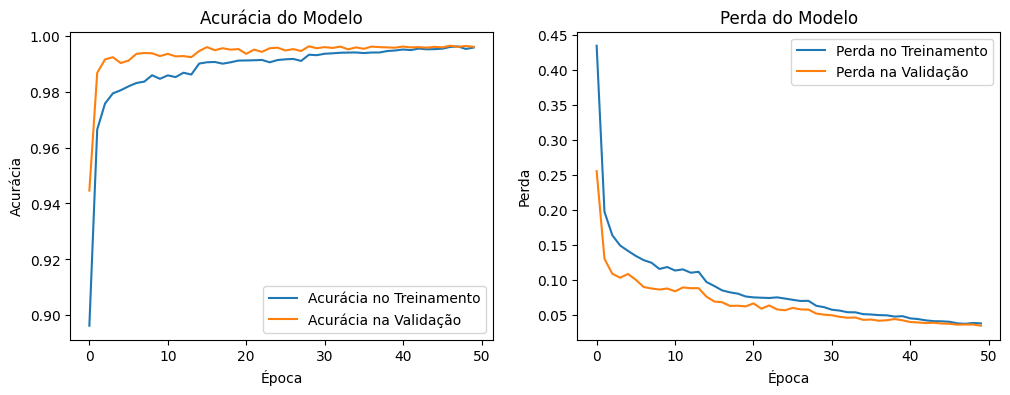

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


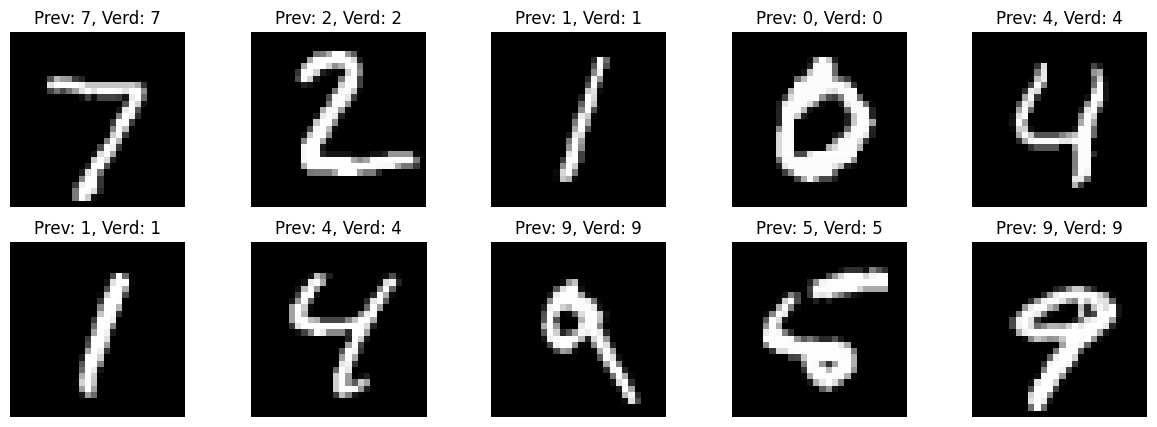

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Redimensionar para adicionar o canal (imagens em tons de cinza)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Converter labels para one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation para melhorar generalização
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Construir a CNN
model = models.Sequential()

# Primeiro bloco convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        kernel_regularizer=regularizers.l2(1e-4),
                        input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Segundo bloco convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Camadas fully connected
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Exibir arquitetura do modelo
model.summary()

# Callbacks para melhor treinamento
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

# Treinar o modelo
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks,
                    verbose=1)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')

# Plotar histórico de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Fazer previsões em algumas imagens de teste
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Exibir algumas previsões
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prev: {predicted_classes[i]}, Verd: {true_classes[i]}')
    plt.axis('off')
plt.show()

8. Classificando imagens grandes utilizando o Inception V3.
    
    A. Baixe algumas imagens de vários animais. Carregue-as no Python, por exemplo, utilizando a função matplotlib.image.mpimg.imread() ou a função scipy.misc.imread(). Redimensione e/ou corte-as em 299x299 pixels e garanta que elas tenham apenas três canais (RGB), sem o de transparência. As imagens que foram treinadas no modeelo Inception foram pré-processadas para que seus valores variarem de -1,0 a 1,0, então você deve garantir isso também para as suas.
    
    B. Faça o download do modelo mais recente do Inception v3: o ponto de verificação está disponpivel em https://google.gl/25uDF7. A lista dos nomes das classes está disponível em https://goo.gl/brXRtZ, mas você deve inserir uma classe "background" no inicio.
    
    C. Crie o modelo Inception v3 chamando a função inception_v3(), como mostrado abaixo. Isto deve ser feito dentro de um escopo do argumento criado pela função inception_v3_arg_scope(). Você também deve configurar is_training=False e num_classes=1001 da seguinte forma:

        from tensorflow.contrib.slim.nets import inception
        import tensorflow.contrib.slim as slim

        X = tf.placeholder(tf.float32, shape=[None,299,299,3], name="X")
        with slim.arg_scope(inception.inception_v3_arg_scope()):
            logits, end_points = inception.inception_v3(
                X, num_classes=1001, istraining=Flase)
        predictions = end_points['Predictions']
        saver = tf.train.Saver()

    D. Abra uma sessão e utilizar o Saver para restaurar o ponto de verificação do modelo pré-treinado que você baixou anteriormente.
    E. Execute o modelo para classificar as imagens que você preparou. Exiba as cinco principais previsões para cada imagem junto com a probabilidade estimada. Qual é a acurácia do modelo?

CLASSIFICAÇÃO DE IMAGENS COM INCEPTION V3
Procurando imagens específicas...
✓ Encontrada: American_Eskimo_Dog.jpg
✓ Encontrada: Cat03.jpg
✓ Encontrada: Domestic_Goose.jpg

INFORMAÇÕES DAS IMAGENS
Imagem: American_Eskimo_Dog.jpg
  Dimensões: 1213 x 1546
  Canais: 3
  Tamanho do arquivo: 645.9 KB
----------------------------------------
Imagem: Cat03.jpg
  Dimensões: 1598 x 1600
  Canais: 3
  Tamanho do arquivo: 273.0 KB
----------------------------------------
Imagem: Domestic_Goose.jpg
  Dimensões: 1714 x 1296
  Canais: 3
  Tamanho do arquivo: 827.9 KB
----------------------------------------

INICIANDO CLASSIFICAÇÃO...
Processando 3 imagens...
Carregando modelo Inception V3...
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Fazendo previsões...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

IMAGEM: American_Eskimo_Dog.jpg
TOP 5 PREVISÕES:
----------------------------------------
  1. SAMOYED: 0.8729 (87.29%)
  2. ARCTIC_FOX: 0.0144 (1.44%)
  3. PO

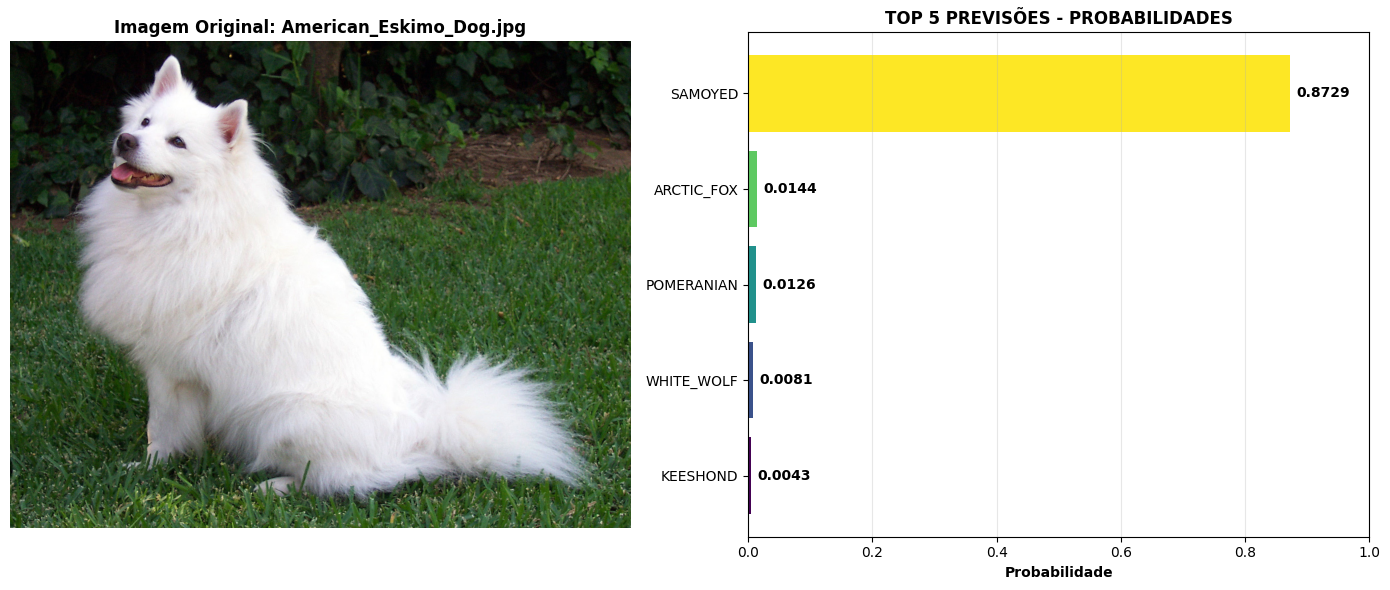


IMAGEM: Cat03.jpg
TOP 5 PREVISÕES:
----------------------------------------
  1. TIGER_CAT: 0.8619 (86.19%)
  2. TABBY: 0.0901 (9.01%)
  3. EGYPTIAN_CAT: 0.0095 (0.95%)
  4. PLASTIC_BAG: 0.0026 (0.26%)
  5. TUB: 0.0013 (0.13%)


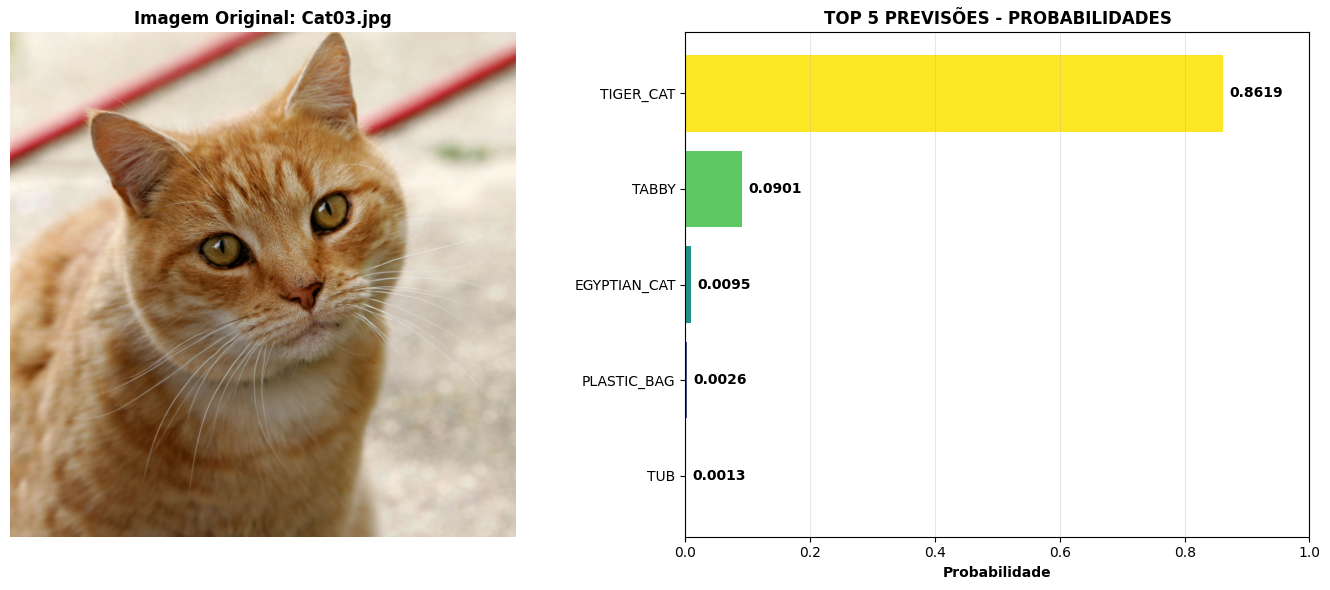


IMAGEM: Domestic_Goose.jpg
TOP 5 PREVISÕES:
----------------------------------------
  1. GOOSE: 0.9730 (97.30%)
  2. DRAKE: 0.0057 (0.57%)
  3. SPOONBILL: 0.0010 (0.10%)
  4. EUROPEAN_GALLINULE: 0.0008 (0.08%)
  5. ALBATROSS: 0.0006 (0.06%)


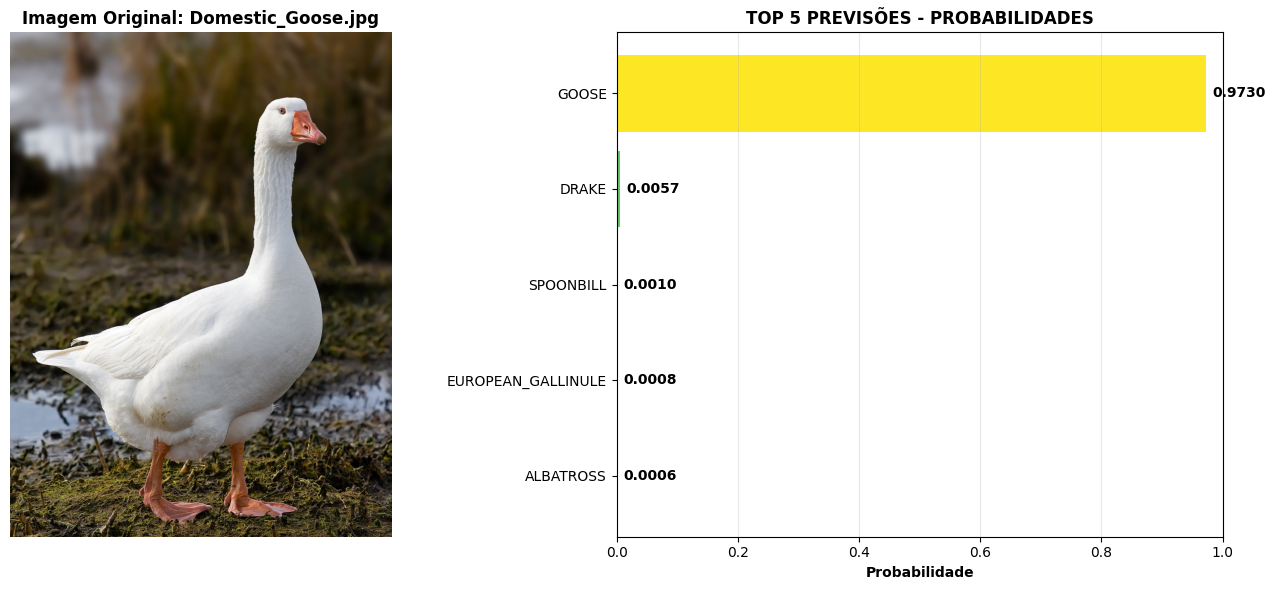


✅ CLASSIFICAÇÃO CONCLUÍDA COM SUCESSO!

RESUMO DAS PREVISÕES PRINCIPAIS:
--------------------------------------------------
American_Eskimo_Dog.jpg   → SAMOYED              (0.8729)
Cat03.jpg                 → TIGER_CAT            (0.8619)
Domestic_Goose.jpg        → GOOSE                (0.9730)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# A. Preparação das imagens
def load_and_preprocess_images(image_paths, target_size=(299, 299)):
    """
    Carrega e pré-processa imagens para o Inception V3
    """
    processed_images = []
    
    for img_path in image_paths:
        # Carregar imagem usando Keras
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        
        # Pré-processamento específico para InceptionV3
        img_array = preprocess_input(img_array)
        
        processed_images.append(img_array)
    
    return np.array(processed_images)

# B. Carregar modelo pré-treinado
def load_inception_model():
    """
    Carrega o modelo Inception V3 pré-treinado
    """
    # Carregar modelo com pesos pré-treinados no ImageNet
    model = InceptionV3(weights='imagenet')
    return model

# C. Classificação das imagens
def classify_images(image_paths):
    """
    Classifica imagens usando Inception V3
    """
    # Verificar se as imagens existem
    valid_paths = []
    for path in image_paths:
        if os.path.exists(path):
            valid_paths.append(path)
        else:
            print(f"Aviso: Imagem não encontrada - {path}")
    
    if not valid_paths:
        print("Nenhuma imagem válida para classificar.")
        return None
    
    print(f"Processando {len(valid_paths)} imagens...")
    
    # Pré-processar imagens
    images = load_and_preprocess_images(valid_paths)
    
    # Carregar modelo
    print("Carregando modelo Inception V3...")
    model = load_inception_model()
    
    # Fazer previsões
    print("Fazendo previsões...")
    predictions = model.predict(images)
    
    # Decodificar previsões
    decoded_predictions = decode_predictions(predictions, top=5)
    
    # Exibir resultados
    for i, img_path in enumerate(valid_paths):
        print(f"\n{'='*60}")
        print(f"IMAGEM: {os.path.basename(img_path)}")
        print("TOP 5 PREVISÕES:")
        print("-" * 40)
        
        for j, (imagenet_id, label, score) in enumerate(decoded_predictions[i]):
            print(f"  {j+1}. {label.upper()}: {score:.4f} ({score*100:.2f}%)")
        
        # Exibir imagem
        plt.figure(figsize=(14, 6))
        
        # Imagem original
        plt.subplot(1, 2, 1)
        original_img = mpimg.imread(img_path)
        plt.imshow(original_img)
        plt.title(f"Imagem Original: {os.path.basename(img_path)}", fontsize=12, fontweight='bold')
        plt.axis('off')
        
        # Gráfico de barras das previsões
        plt.subplot(1, 2, 2)
        labels = [pred[1] for pred in decoded_predictions[i]]
        scores = [pred[2] for pred in decoded_predictions[i]]
        
        colors = plt.cm.viridis(np.linspace(0, 1, 5))
        bars = plt.barh(range(5), scores[::-1], color=colors)
        
        # Adicionar valores nas barras
        for idx, (bar, score) in enumerate(zip(bars, scores[::-1])):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{score:.4f}', va='center', ha='left', fontweight='bold')
        
        plt.yticks(range(5), [label.upper() for label in labels[::-1]])
        plt.title("TOP 5 PREVISÕES - PROBABILIDADES", fontsize=12, fontweight='bold')
        plt.xlabel("Probabilidade", fontweight='bold')
        plt.xlim(0, 1)
        plt.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return decoded_predictions

# D. Função para verificar e carregar imagens específicas
def load_specific_images():
    """
    Carrega as imagens específicas mencionadas
    """
    image_files = ["American_Eskimo_Dog.jpg", "Cat03.jpg", "Domestic_Goose.jpg"]
    found_images = []
    
    print("Procurando imagens específicas...")
    for img_file in image_files:
        if os.path.exists(img_file):
            found_images.append(img_file)
            print(f"✓ Encontrada: {img_file}")
        else:
            print(f"✗ Não encontrada: {img_file}")
    
    return found_images

# E. Função para mostrar informações das imagens
def show_image_info(image_paths):
    """
    Mostra informações básicas sobre as imagens
    """
    print("\n" + "="*60)
    print("INFORMAÇÕES DAS IMAGENS")
    print("="*60)
    
    for path in image_paths:
        if os.path.exists(path):
            img = mpimg.imread(path)
            print(f"Imagem: {os.path.basename(path)}")
            print(f"  Dimensões: {img.shape[0]} x {img.shape[1]}")
            print(f"  Canais: {img.shape[2] if len(img.shape) > 2 else 1}")
            print(f"  Tamanho do arquivo: {os.path.getsize(path) / 1024:.1f} KB")
            print("-" * 40)

# Execução principal
if __name__ == "__main__":
    print("CLASSIFICAÇÃO DE IMAGENS COM INCEPTION V3")
    print("=" * 60)
    
    # Carregar as imagens específicas
    image_paths = load_specific_images()
    
    if not image_paths:
        print("\n❌ Nenhuma das imagens específicas foi encontrada.")
        print("Verifique se os arquivos estão no mesmo diretório:")
        print("  - American_Eskimo_Dog.jpg")
        print("  - Cat03.jpg") 
        print("  - Domestic_Goose.jpg")
        exit()
    
    # Mostrar informações das imagens
    show_image_info(image_paths)
    
    # Classificar as imagens
    print("\n" + "="*60)
    print("INICIANDO CLASSIFICAÇÃO...")
    print("="*60)
    
    predictions = classify_images(image_paths)
    
    if predictions:
        print("\n" + "="*60)
        print("✅ CLASSIFICAÇÃO CONCLUÍDA COM SUCESSO!")
        print("="*60)
        
        # Resumo das previsões top-1
        print("\nRESUMO DAS PREVISÕES PRINCIPAIS:")
        print("-" * 50)
        for i, path in enumerate(image_paths):
            top_pred = predictions[i][0]  # Previsão top-1
            print(f"{os.path.basename(path):25} → {top_pred[1].upper():20} ({top_pred[2]:.4f})")

9. Transferência de aprendizado para classificação de imagens grandes.

    A. Crie um conjunto de treinamento contendo pelo menos 100 imagens por classe. Por exemplo, você pode classificar suas próprias imagens com base no local (praia, montanha, cidade, etc.) ou, como alternativa, utilizar apenas um conjunto de dados existente como o conjunto de dados das flores (https://goo.gl/Eg/VXZ)
    
    B. Escreva uma etapa de pré-processamento que redimensionará e recortará a imagem em 299x299 com alguma aleatoriedade para o aumento de dados.
    
    C. Utilizando o modelo Inception v3 pré-treinado do exercício anterior, congele todas as camadas até a camada de gargalo(ou seja, a última camada antes da camada de saída) e substitua a camada de saída pelo número apropriado de saídas para sua nova tarefa de classificação (por exemplo, o conjunto de dados das flores tem cinco classes mutualmente exclusivas, então a camada de saída deve ter cinco neurônios e utilizar a função de ativação softmax).
    
    D. Divida seu conjunto de dados em um conjunto de treinamento e um conjunto de testes. Treine o modelo no conjunto de treinamento e o avalie no conjunto de testes.

🌻 TRANSFERÊNCIA DE APRENDIZADO - FLOWERS DATASET
🌺 Download do dataset de flores do Kaggle...


100%|██████████| 205M/205M [00:08<00:00, 26.0MB/s] 

Extracting files...


✓ Dataset baixado em: C:\Users\andre\.cache\kagglehub\datasets\imsparsh\flowers-dataset\versions\2
✓ Imagens encontradas em: C:\Users\andre\.cache\kagglehub\datasets\imsparsh\flowers-dataset\versions\2
📊 Distribuição das classes:
  test: 924 imagens
  train: 0 imagens
Found 2937 images belonging to 2 classes.
Found 733 images belonging to 2 classes.
⚖️ Pesos das classes: {0: np.float64(1.9844594594594596), 1: np.float64(0.6684114701866181)}

🚀 Iniciando treinamento...
🎯 Fase 1: Transfer Learning


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5335 - loss: 3.1548 - val_accuracy: 0.2524 - val_loss: 3.0727 - learning_rate: 1.0000e-04
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5526 - loss: 3.0562 - val_accuracy: 0.2619 - val_loss: 3.6504 - learning_rate: 1.0000e-04
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5829 - loss: 2.9955 - val_accuracy: 0.2701 - val_loss: 3.8133 - learning_rate: 1.0000e-04
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5809 - loss: 2.9466 - val_accuracy: 0.2688 - val_loss: 3.8704 - learning_rate: 1.0000e-04
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.6010 - loss: 2.9034 - val_accuracy: 0.2742 - val_loss: 3.8837 - learning_rate: 5.0000e-05
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5802 - loss: 2.9051 - val_accuracy: 0.2769 - val_loss: 4.0499 - learning_rate: 5.0000e-05
🎯 Fase 2: Fine-tuning
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/st

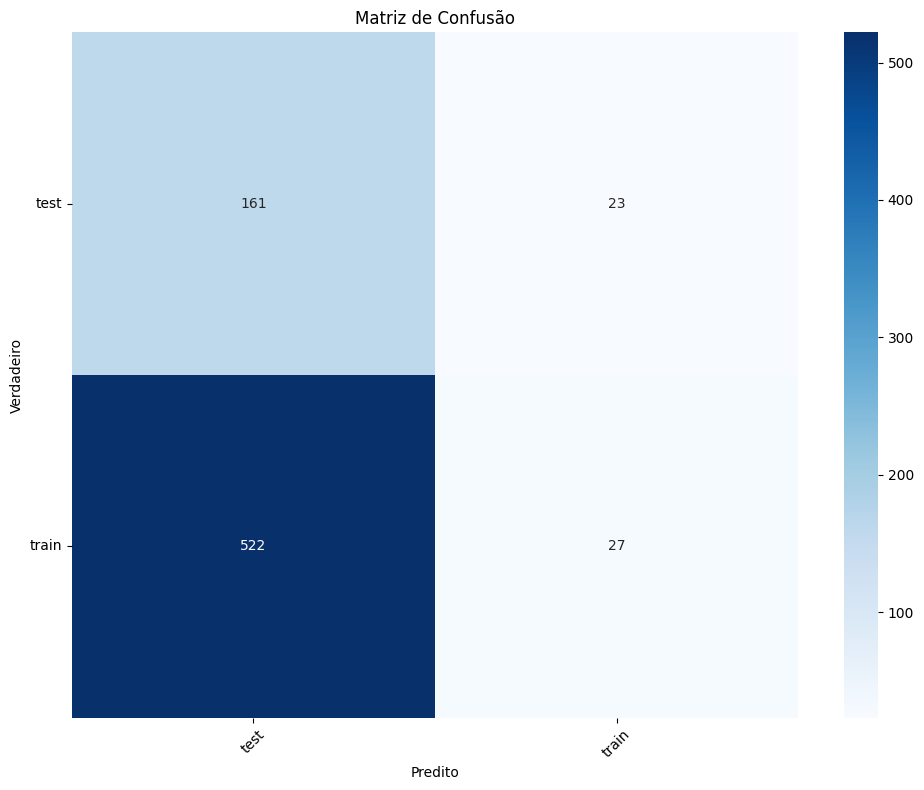

✓ Modelo salvo como 'flowers_classification_model.h5'


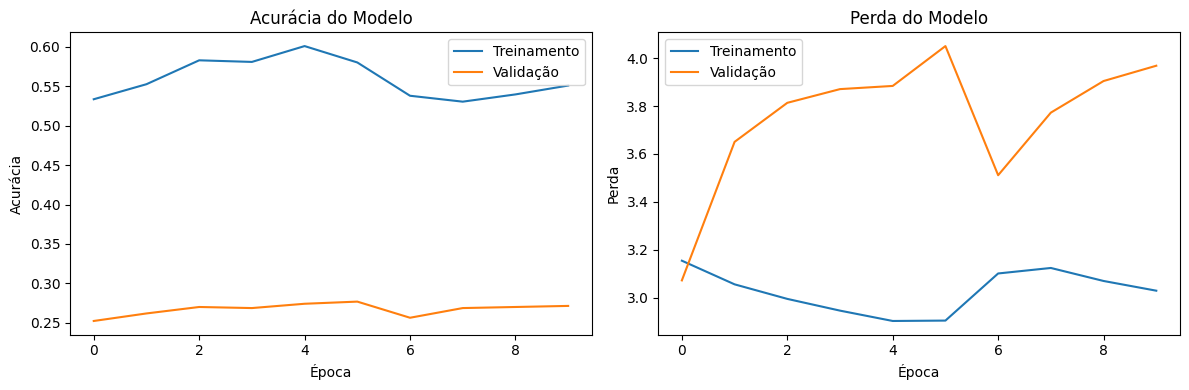

In [7]:
# Transferência de Aprendizado com Flowers Dataset do Kaggle

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import shutil

# 1. Download e preparação do dataset do Kaggle
def download_kaggle_dataset():
    """
    Faz download do dataset de flores do Kaggle
    """
    print("🌺 Download do dataset de flores do Kaggle...")
    try:
        # Download do dataset
        path = kagglehub.dataset_download("imsparsh/flowers-dataset")
        print(f"✓ Dataset baixado em: {path}")
        
        # O dataset geralmente vem em uma estrutura zipada, vamos encontrar as imagens
        dataset_path = find_flowers_images(path)
        return dataset_path
        
    except Exception as e:
        print(f"❌ Erro no download do dataset: {e}")
        print("Tentando usar dataset local como fallback...")
        return "flower_photos"  # Fallback para dataset local

def find_flowers_images(base_path):
    """
    Encontra o diretório com as imagens de flores
    """
    # Procurar por diretórios comuns que contêm imagens
    possible_paths = [
        base_path,
        os.path.join(base_path, "flowers"),
        os.path.join(base_path, "flower_photos"),
        os.path.join(base_path, "data"),
        os.path.join(base_path, "images"),
    ]
    
    for path in possible_paths:
        if os.path.exists(path) and any(os.path.isdir(os.path.join(path, d)) for d in os.listdir(path)):
            print(f"✓ Imagens encontradas em: {path}")
            return path
    
    # Se não encontrar, criar estrutura a partir do conteúdo
    return create_flowers_structure(base_path)

def create_flowers_structure(base_path):
    """
    Cria estrutura organizada a partir do dataset baixado
    """
    print("Organizando estrutura do dataset...")
    target_dir = "organized_flowers"
    os.makedirs(target_dir, exist_ok=True)
    
    # Mapeamento de classes comuns
    class_mapping = {
        'daisy': ['daisy', 'daisy_'],
        'dandelion': ['dandelion', 'dandelion_'],
        'rose': ['rose', 'roses', 'rose_'],
        'sunflower': ['sunflower', 'sunflowers', 'sunflower_'],
        'tulip': ['tulip', 'tulips', 'tulip_']
    }
    
    # Procurar e organizar imagens
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                
                # Tentar classificar baseado no nome do arquivo
                found_class = None
                for cls, keywords in class_mapping.items():
                    if any(keyword in file.lower() for keyword in keywords):
                        found_class = cls
                        break
                
                if found_class:
                    class_dir = os.path.join(target_dir, found_class)
                    os.makedirs(class_dir, exist_ok=True)
                    shutil.copy2(file_path, os.path.join(class_dir, file))
    
    print(f"✓ Dataset organizado em: {target_dir}")
    return target_dir

# 2. Análise do dataset
def analyze_dataset(data_dir):
    """
    Analisa o dataset e verifica balanceamento
    """
    classes = []
    class_counts = {}
    
    if os.path.exists(data_dir):
        classes = [d for d in os.listdir(data_dir) 
                  if os.path.isdir(os.path.join(data_dir, d))]
    
    for cls in classes:
        cls_path = os.path.join(data_dir, cls)
        image_files = [f for f in os.listdir(cls_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[cls] = len(image_files)
    
    print("📊 Distribuição das classes:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count} imagens")
    
    return class_counts, classes

# 3. Data augmentation e geradores
def create_data_generators(data_dir, batch_size=32, img_size=(299, 299)):
    """
    Cria geradores de dados com balanceamento
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range=0.3,
        shear_range=0.2,
        brightness_range=[0.7, 1.3],
        fill_mode='reflect',
        validation_split=0.2
    )
    
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42
    )
    
    validation_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=42
    )
    
    # Calcular class weights
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    
    class_weights_dict = dict(enumerate(class_weights))
    print("⚖️ Pesos das classes:", class_weights_dict)
    
    return train_generator, validation_generator, class_weights_dict

# 4. Model architecture
def create_model(num_classes):
    """
    Cria modelo InceptionV3 com transfer learning
    """
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299, 3)
    )
    
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.6),
        layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model, base_model

# 5. Training function
def train_model(model, base_model, train_generator, validation_generator, class_weights):
    """
    Treina o modelo em duas fases
    """
    # Phase 1: Transfer Learning
    print("🎯 Fase 1: Transfer Learning")
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=3)
    ]
    
    history_phase1 = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=1
    )
    
    # Phase 2: Fine-tuning
    print("🎯 Fase 2: Fine-tuning")
    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False
    
    model.compile(
        optimizer=Adam(learning_rate=0.00001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history_phase2 = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=1,
        initial_epoch=len(history_phase1.history['accuracy'])
    )
    
    # Combine histories
    combined_history = {
        'accuracy': history_phase1.history['accuracy'] + history_phase2.history['accuracy'],
        'val_accuracy': history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'],
        'loss': history_phase1.history['loss'] + history_phase2.history['loss'],
        'val_loss': history_phase1.history['val_loss'] + history_phase2.history['val_loss']
    }
    
    return model, combined_history

# 6. Evaluation
def evaluate_model(model, validation_generator, classes):
    """
    Avaliação detalhada do modelo
    """
    validation_generator.reset()
    y_pred = model.predict(validation_generator, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes
    
    print("\n📊 Relatório de Classificação:")
    print(classification_report(y_true, y_pred_classes, target_names=classes, digits=4))
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 7. Main execution
def main():
    print("🌻 TRANSFERÊNCIA DE APRENDIZADO - FLOWERS DATASET")
    print("=" * 60)
    
    # Download dataset
    data_dir = download_kaggle_dataset()
    
    # Analyze dataset
    class_counts, classes = analyze_dataset(data_dir)
    num_classes = len(classes)
    
    if num_classes == 0:
        print("❌ Nenhuma classe encontrada. Verifique a estrutura do dataset.")
        return
    
    # Create data generators
    train_generator, validation_generator, class_weights = create_data_generators(data_dir)
    
    # Create model
    model, base_model = create_model(num_classes)
    
    # Train model
    print("\n🚀 Iniciando treinamento...")
    model, history = train_model(model, base_model, train_generator, validation_generator, class_weights)
    
    # Evaluate
    print("\n✅ Avaliando modelo...")
    test_loss, test_acc = model.evaluate(validation_generator, verbose=0)
    print(f"Acurácia final: {test_acc:.4f}")
    
    evaluate_model(model, validation_generator, classes)
    
    # Save model
    model.save('flowers_classification_model.h5')
    print("✓ Modelo salvo como 'flowers_classification_model.h5'")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Treinamento')
    plt.plot(history['val_accuracy'], label='Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Treinamento')
    plt.plot(history['val_loss'], label='Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Install kagglehub if not available
    try:
        import kagglehub
    except ImportError:
        print("📦 Instalando kagglehub...")
        import subprocess
        subprocess.check_call(["pip", "install", "kagglehub"])
        import kagglehub
    
    main()